# Section E. Multiclass Perceptron

In this section, you are asked to demonstrate your understanding of linear models for classification. You expand the binary-class perceptron algorithm that is covered in Activity 1 of Module 3 into a multiclass classifier. Then, you study the effect of the learning rate on the error rate. This section assesses your programming, and analytical skills.

**Background**. Assume we have N training examples ${(x_1,t_1),...,(x_N,t_N)}$ where tn can get K discrete values ${C_1, ..., C_K}$, i.e. a K-class classification problem. We use 𝑦𝑛 to represent the predicted label of $X_𝑛$.

**Model**. To solve a K-class classification problem, we can learn K weight vectors $w_k$, each of which corresponding to one of the classes.

**Prediction**. In the prediction time, a data point x will be classified as argmaxk $w_{k.x}$

**Training Algorithm**. We train the multiclass perceptron based on the following algorithm:

- Initialise the weight vectors randomly $w_1,..,w_K$
- While not converged do:
    - For n = 1 to N do:
        - y = argmaxk wk . xn
        - If yn != tn do
            - $w_{y n}$ : = $w_{y n}$ − ηx
            - $w_{t n}$ : = $w_{t n}$ − ηx

In what follows, we look into the convergence properties of the training algorithm
for multiclass perceptron (similar to Activity 1 of Module 3).


#### Importing Libraries

In [14]:
# Load libraries
library(ggplot2)
library(reshape2)

### Question 6 [Multiclass Perceptron, 20 Marks]

    I. Load Task1D_train.csv and Task1D_test.csv sets.

In [15]:
train <- read.csv("data\\Task1D_train.csv")
test <- read.csv("data\\Task1D_test.csv")

Warning message in file(file, "rt"):
"cannot open file 'data\Task1D_train.csv': No such file or directory"


ERROR: Error in file(file, "rt"): cannot open the connection


In [16]:
# Separate labels and predictors
train.data = train[,-5]
train.label = train[,5]
test.data = test[,-5]
test.label = test[,5]

# Scale data
train.data = scale(train.data)
test.data = scale(test.data)

# supporting variables
train.len = nrow(train)
test.len = nrow(test)

    II. Implement the multiclass perceptron as explained above. Please provide enough comments for your code in your submission.

#### Auxiliary Error Function

In [17]:
error_fun <- function(X, W, true_label, row) {

# Calculate predictions for current models and the error value
    predictions <- data.frame(matrix(nrow = nrow(X), ncol = length(W)))
    for (j in 1:length(W)) {
        predictions[ , j] = X%*%W[[j]][row,]
    }

    T = as.integer(substr(true_label,2,length(true_label))) 
    pred = max.col(predictions)
    error.percentage = (sum(pred != T)/nrow(predictions))*100
    return (error.percentage)
}

#### Multiclass Perceptron

In [18]:
multi_class_perceptron <- function(train.data, train.label, eta, epsilon, tau.max) {
    
    # epsilon: Stoping criterion
    # eta: Learning Rate
    # tau.max: Maximum number of iterations
    
    L <- unique(sort(train.label)) # vector of unique labels
    K <- length(L) # number of classes of labels
    Phi <- as.matrix(cbind(1, train.data)) # add a column of 1 to training data
    T <- train.label # rename just for conviniance
    train.len <- nrow(train.data)
        
    W_list <- list()
    # creating K vectors and performing initialization 
    for (k in 1:K) {
              
        W_list[[k]] <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # empty vectors
        W_list[[k]][1,] <- runif(ncol(Phi)) # Random initial values for weight vectors
    }  

    error = matrix(,nrow = tau.max, ncol=1) # To store error values
    error[1,] = error_fun(Phi, W_list, T, 1) # first error

    
    tau <- 1 # iteration counter 
    terminate <- FALSE # termination status
    
    while(!terminate){
    
        # Shuffle the data
        train.index <- sample(1:train.len, replace = FALSE)
        Phi <- Phi[train.index, ]
        T <- T[train.index]

        #For each point...
        for (i in train.index){

            # Check the termination creteria
            if (tau == tau.max) {break}
            
            val = c()
            
            for (k in 1:K) {
            
                # Calculate the predictions of current models for current point
                val[k] = W_list[[k]][tau,]%*%Phi[i,]
                
                }
            
            # identify true label and predicted label
            max_label <- which.max(val)
            real_label <- which(L == T[i])
            
            # If prediction is not the label
            if (max_label != real_label){
                
                # Increase iteration counter
                tau = tau +1
                for (k in 1:K) {
                    
                    W_list[[k]][tau,] <- W_list[[k]][tau-1,] # update all W's with W-1
                    
                    }
                  
                # Update the hyperplanes that are involved in the incorrect prediction 
                # using the standard formula
                W_list[[real_label]][tau,] <- W_list[[real_label]][tau - 1,] + eta*Phi[i,]
                W_list[[max_label]][tau,] <- W_list[[max_label]][tau - 1,] - eta*Phi[i,]
                                                        

                # calculate error rate with supporting function
                error[tau, ] <- error_fun(Phi, W_list, T, tau)
            }
        }     
            
    # decrease eta
    eta <- eta * 0.99

    # recalculate termination conditions
    terminate <- (tau >= tau.max | (error[tau, ] <= epsilon))
        
    }

    # create a list to return W's 
    # removing all (empty) points after TAU
    W_return <-list() 
    for (i in 1:k){
    W_return[[i]] <- W_list[[i]][1:tau,]
    }
    
    return(W_return)
    
}

    III. Train two multiclass perceptron models on the provided training data by setting the learning rates η to .09 and .01 respectively. Note that all parameter settings stay the same, except the learning rate, when building each model. 
    
    For each model, evaluate the error of the model on the test data, after processing every 5 training data points (also known as a mini-batch). Then, plot the testing errors of two models built based on the learning rates .09 and .01(with different colors) versus the number of mini-batches. Include it in your Jupyter Notebook file for Question 6. 

In [19]:
set.seed(2000)

# Generating WLists with eta = 0.09 and eta = 0.01
W_list_01 = multi_class_perceptron(train.data, train.label, eta=0.01, epsilon=0.01, tau.max=1000)
W_list_09 = multi_class_perceptron(train.data, train.label, eta=0.09, epsilon=0.01, tau.max=1000)

# create test_list to fit the formula and support variable 
test_Phi = as.matrix(cbind(1, test.data))
test.len <- nrow(test.data)

T = test.label # rename for simplicity

# create sequence for interaction
sequence = seq(from=1, to = min(nrow(W_list_01[[1]]),nrow(W_list_09[[1]])), by=5) 


error_test = data.frame() 

t=1
u=1
for(i in seq(from=1, to =nrow(W_list_01[[1]]), by = 5)){
    error_test[u,"0.01"] = error_fun(test_Phi,W_list_01,T,i)
    u=u+1
}

    for(j in seq(from=1, to =nrow(W_list_09[[1]]), by = 5)){
    error_test[t,"0.09"] = error_fun(test_Phi,W_list_09,T,j)
    t=t+1
}
error_test[,"number"] <- as.numeric(rownames(error_test))

Warning message:
"Removed 21 row(s) containing missing values (geom_path)."


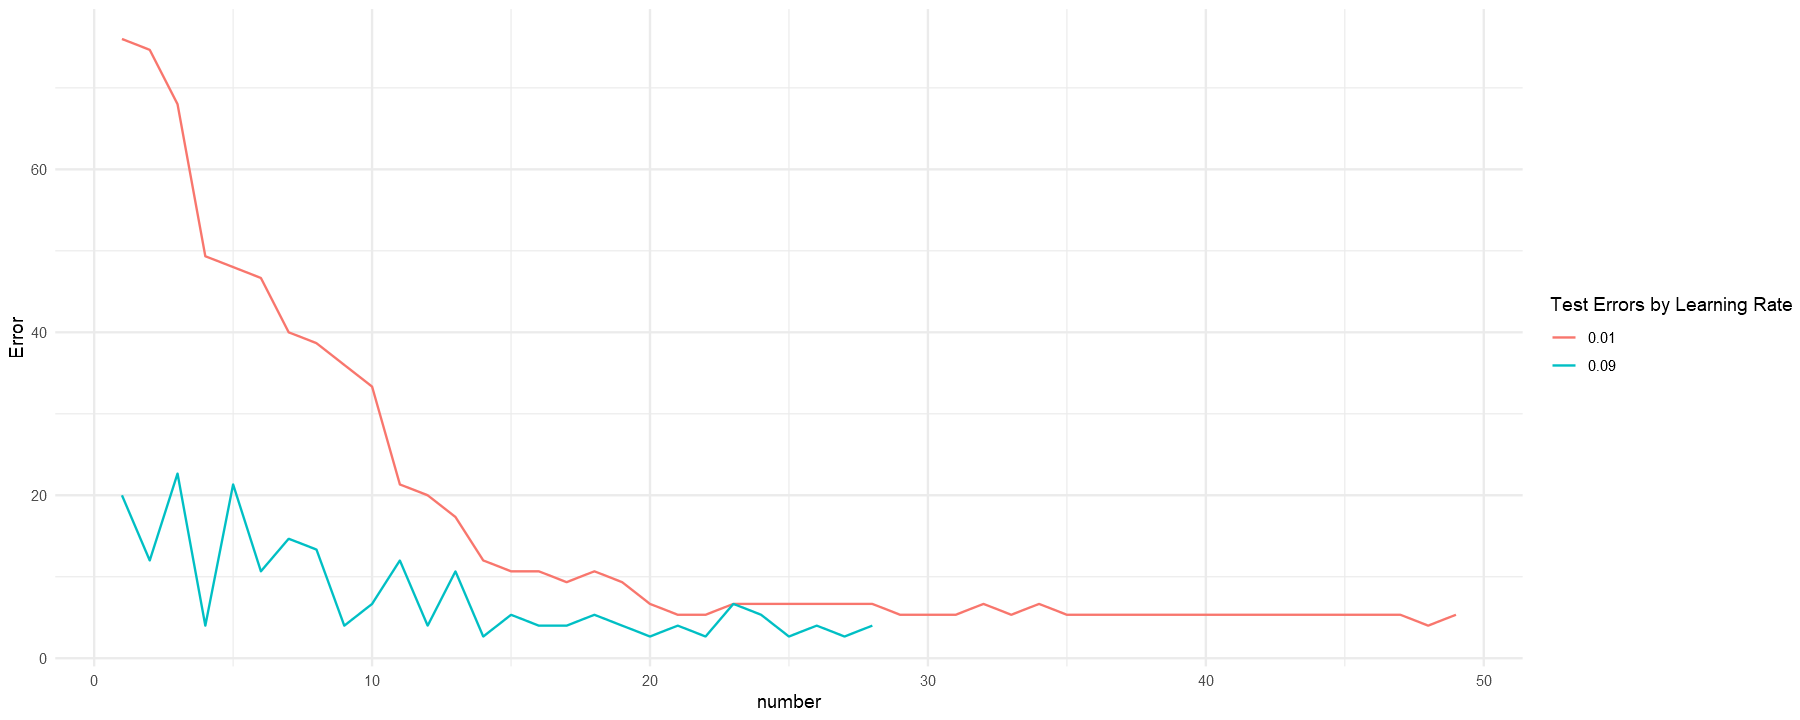

In [20]:
# reshaping for ggplot
error_test.m <- melt(error_test, id.vars = "number",value.name = "Error", variable.name = "Eta")
# adjusting plot size
options(repr.plot.width = 15, repr.plot.height = 6)
# plotting
ggplot(data = error_test.m, mapping = aes(x =number, y = Error, color = Eta)) + geom_line() +
    scale_color_discrete(guide = guide_legend(title = 'Test Errors by Learning Rate')) + theme_minimal()

   Now, explain how the testing errors of two models behave differently, as the training data increases, by observing your plot. (Include all your answers in your Jupyter Notebook file.)

- **We can se from the plot that there is a trend of decrease in the error as the number of baches increase in both lineplots. It demonstrates that the puporse of the Stochastic Gradient Descent is being fulfilled. As the points are being missclassified the weights are being updated with success and at a point the error rate starts to converge to 0.**

- **The plot allow us to compare the trend of the error rate against the number of batches when the learning rate eta = 0.01 and 0.09. As expected, given a higher learning rate, the faster is convergence of the model. While the the model with eta = 0.09 finds the termination at less than 30 batches, it takes almost 50 batches (150 iterations) for the model with eta = 0.09**.